# Heatmaps

Os mapas de calor são uma forma de visualizar três dimensões de dados e aproveitar a proximidade espacial dessas dimensões.

Ao fazer revisões neste curso, fiquei realmente tentado a me livrar da seção sobre mapas de calor, pois já vi mapas de calor ruins o suficiente para durar uma vida inteira. O problema é que os mapas de calor são realmente muito poderosos quando você tem os dados corretos. Os dados meteorológicos são um ótimo exemplo. Você tem duas dimensões, latitude e longitude, e então podemos sobrepor uma terceira dimensão, digamos, temperatura ou quantidade de chuva e usar cores para indicar sua intensidade.

Na verdade, qualquer coisa com um aspecto espacial bidimensional pode criar um mapa de calor natural. Por exemplo, os pontos de fixação ocular por meio da detecção do olhar são usados regularmente por pesquisadores e especialistas em marketing para entender o que as pessoas estão olhando nos sites. Mas onde os mapas de calor falham é quando não há relação contínua - ou pelo menos ordinal - entre as dimensões. Usar um mapa de calor para dados categóricos, por exemplo, é simplesmente errado. Isso induz o espectador a procurar padrões e ordenar por meio da proximidade espacial. E quaisquer desses padrões seriam puramente espúrios.

Mas resolvi manter isso no curso, pois pode ser útil, e montei um novo exemplo usando dados ordenados, então vamos falar sobre as técnicas. No matplotlib, um mapa de calor é simplesmente um histograma bidimensional onde os valores x e y indicam pontos potenciais e a cor plotada é a frequência da observação.

In [1]:
# Let's bring in matplotlib and numpy, as well as pandas and some date time functionality
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

In [4]:
# In this example I want to show you some traffic data from New York City, which is
# all available from NYC open data portal.
df=pd.read_csv("assets/NYC hourly traffic.csv")

# I'm going to convert the date column into a date and time
df["Date"]=df["Date"].apply(pd.to_datetime)

df.head()

,Plaza ID,Date,Hour,Direction,# Vehicles - E-ZPass,# Vehicles - VToll
0,21,2022-08-06,0,I,2820,649
1,21,2022-08-06,1,I,2124,474
2,21,2022-08-06,2,I,1617,391
3,21,2022-08-06,3,I,1228,358
4,21,2022-08-06,4,I,1604,368


Isso pode demorar um pouco para carregar se você estiver acompanhando no Coursera, é um grande conjunto de dados. Vamos reduzi-lo em tamanho e fazer algumas análises básicas de dados exploratórios com histogramas. Digamos que estou interessado em uma única praça (localização da câmera) e datas para o início de 2017. Vou escrever uma consulta de pandas para fazer isso

In [5]:
sample=df.query("`Plaza ID`==5 & Date>'2016-12-30' & Date<'2017-05-01'")
sample

,Plaza ID,Date,Hour,Direction,# Vehicles - E-ZPass,# Vehicles - VToll
735652,5,2017-04-29,0,I,216,25
735653,5,2017-04-29,0,O,100,23
735654,5,2017-04-29,1,I,111,21
735655,5,2017-04-29,1,O,53,18
735656,5,2017-04-29,2,I,72,16
...,...,...,...,...,...,...
773399,5,2016-12-31,21,O,234,54
773400,5,2016-12-31,22,I,180,46
773401,5,2016-12-31,22,O,177,40
773402,5,2016-12-31,23,I,126,30


Essa sintaxe pode parecer um pouco diferente para você do nosso primeiro curso. Esta é uma maneira alternativa de consultar um dataframe e usa uma biblioteca chamada `numexpr` para pegar uma consulta como uma string e aplicá-la ao dataframe. É um pouco como o SQL em sua sintaxe, se você estiver familiarizado com isso, mas tem muitas ressalvas. Eu queria expô-lo para que você soubesse, mas é completamente possível usar o método de mascaramento booleano regular que mostrei no curso 1. Agora seria um ótimo momento para pausar o vídeo, abrir o notebook e ver se você pode reescrever esta consulta usando o conhecimento que já possui sobre mascaramento booleano.

Temos a hora do dia aqui, então vamos dar uma olhada em um histograma de atividade ao longo do dia.

Como temos 24 horas em um dia, colocarei as caixas lá e quero para ver nossa frequência -- os pesos de cada bin -- como o número de veículos que possuem o sistema E-ZPass. Este sistema cobra automaticamente motoristas para usar a estrada e já foi agregado (somado) para nós a partir de observações individuais

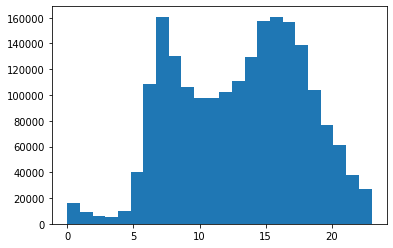

In [6]:
plt.hist(sample["Hour"],bins=24,weights=sample["# Vehicles - E-ZPass"]);

Ok, o que você percebe aqui? Vejo dois picos, de manhã por volta das 7h30 e à tarde começando por volta das 3 até as 6. Parece hora do rush!

Neste exemplo, nossas horas são ordenadas, portanto, faz sentido visualizar os dados dessa maneira. Mas também temos dias da semana que são ordenados. Vamos extrair o dia da semana e ver um histograma disso.

<ipython-input-7-36b5420c3ff8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample["Day of Week"]=sample["Date"].dt.dayofweek


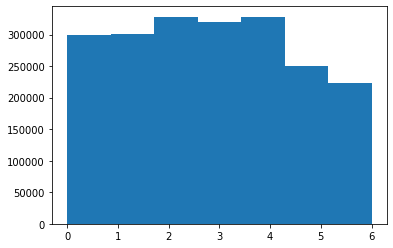

In [7]:
# Podemos extrair o dia da semana da coluna Data usando o
# recursos de data e hora do pandas. O objeto Series em pandas tem um
# atributo "dt" que armazena inúmeras transformações de data e hora para
# nós porque é uma necessidade tão comum. Neste caso, apenas tomamos o
# Coluna de data (que é um objeto Series) e obtenha o .dt.dayofweek
# a partir dele.

sample["Day of Week"]=sample["Date"].dt.dayofweek

# Once we have done that we can just look at a histogram
plt.hist(sample["Day of Week"],bins=7,weights=sample["# Vehicles - E-ZPass"]);

Ok, então podemos ver que o fluxo de tráfego é bastante estável, exceto nos dias 5 e 6 da semana, que são os finais de semana. Agora, poderíamos isolar esses dias e observar os histogramas individuais para o tráfego horário, mas também podemos observar um histograma conjunto - ou um mapa de calor - para as variáveis horárias e diárias. Quando fazemos isso, definimos uma variável para ser o eixo x, outra para ser o eixo y, e então renderizamos nossa frequência (nossos pesos) como cores diferentes mostrando a terceira dimensão.

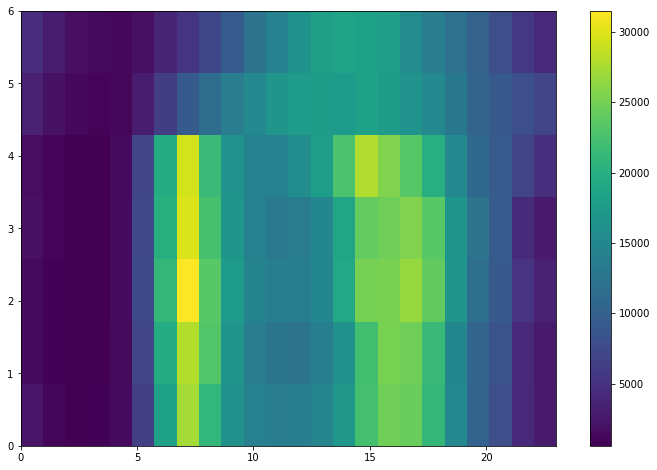

In [8]:
# While it sounds like a lot of work, it isn't really in matplotlib!
# The API looks almost the same as a regular histogram, but in this
# case we have to specify the bin size for each axis
plt.figure(figsize=(12,8)) # make a slightly bigger figure
plt.hist2d(sample["Hour"],
           sample["Day of Week"],
           bins=[24,7],
           weights=sample["# Vehicles - E-ZPass"])

# This next part is optional, but adds a legend telling you the value
# of each bin (cell) in the histogram
plt.colorbar();

Ótimo! Então vamos dissecar isso. Primeiro, vemos que em todos os dias (nosso eixo y) as primeiras quatro horas do dia são azuis escuras (essas são as primeiras quatro colunas ou mais), indicando relativamente pouco tráfego. Então vemos que para os dias 0 a 4 temos um pico no tráfego, mostrado como mais células de intensidade amarela na imagem, mas isso não é verdade para os últimos dois dias da semana (o fim de semana - as duas primeiras linhas ).

Os dados de tempo são um caso interessante para usar mapas de calor, porque geralmente temos ciclos de atividade dentro de um período de tempo -- neste caso semanas -- e isso nos permite ter duas dimensões ordenadas.

Agora seria um bom momento para você assumir o controle e ver se consegue olhar para uma dimensão diferente - meses. Você poderia traçar um mapa de calor onde um eixo é meses e o outro é, digamos, semana do mês?